Audio Feature Extraction using Librosa

In [1]:
# importing libraries

%matplotlib inline  
import librosa
import librosa.display
import IPython as ipd
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns

ModuleNotFoundError: No module named 'librosa'

In [2]:
# load audio

audio = '/Users/gioelepozzi/Desktop/features_extraction/data/1.mp3' 

y,sr=librosa.load(audio)
ipd.display.Audio(audio)

Audio Sampling Rate: 22050 samples/sec
Total Samples: 706176
Audio Length: 32.02612244897959 s


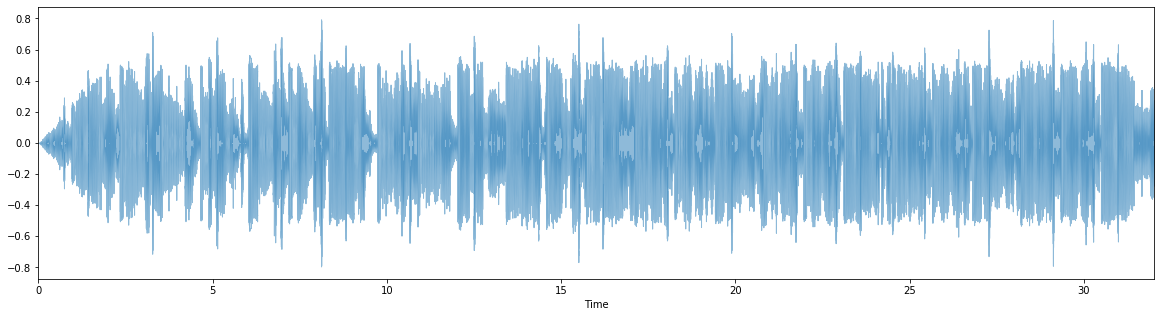

In [3]:
# audio specs

print('Audio Sampling Rate: '+str(sr)+' samples/sec')
print('Total Samples: '+str(np.size(y)))
secs=np.size(y)/sr
print('Audio Length: '+str(secs)+' s')
plt.figure(figsize=(20, 5))
librosa.display.waveplot(y, sr=sr, alpha=0.5)

To determine the music genre of a music piece, a number of content-based features are first extracted.
In general, the features employed for music classification can be roughly categorized into three classes:
    timbral features: related to the type of audio.
            zero crossing
            spectral centroid
            spectral flux
            spectral rolloff
            Mel-frequency cepstral coefficients (MFCC)
            Daubechies wavelet coefficients histograms (DWCH)
            octave-based spectral contrast (OSC)
    rhythmic features: provide main beat and its strength.
    pitch content features: drom pitch histogram, describe melody.

Text(0.5, 1.0, 'Harmonic + Percussive')

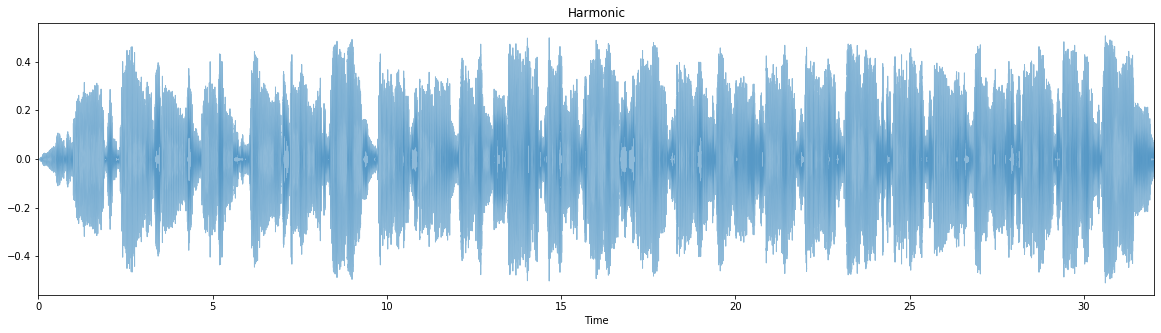

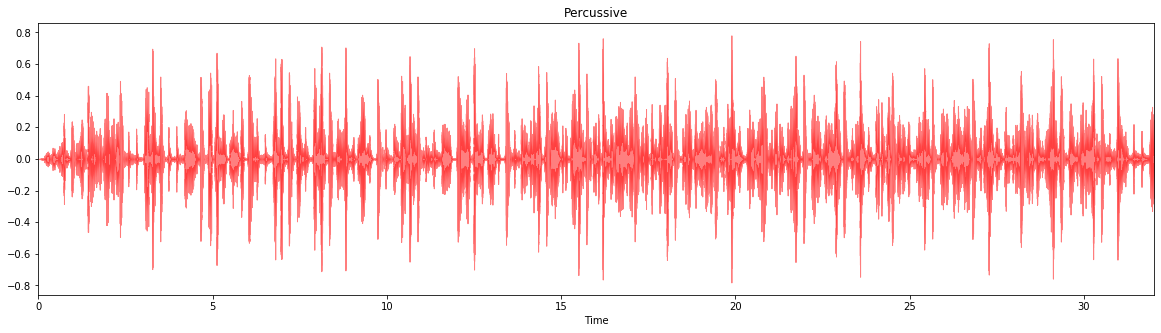

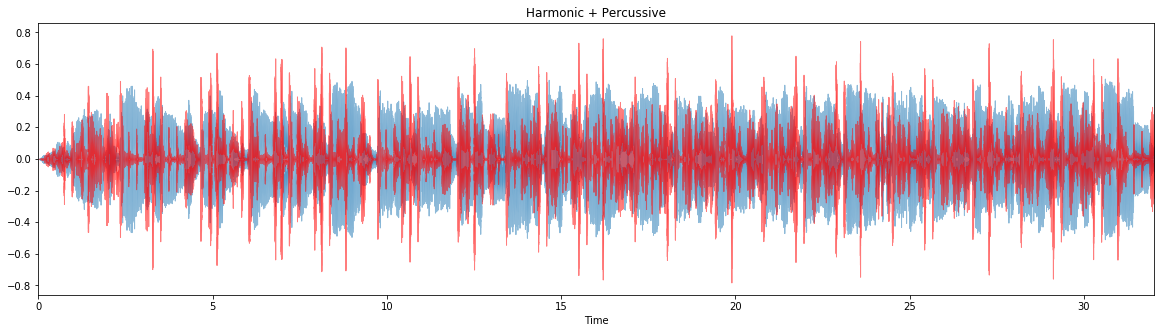

In [4]:
# separation of harmonic and percussive signals
# harmonic part is what we perceive as pitched sound related to melodies and chords
# percussive part is noise-like and stems from instrument onset like drum kick
# HPSS is Harmonic-Percussive Source Separation

h, p = librosa.effects.hpss(y)

plt.figure(figsize=(20, 5))
librosa.display.waveplot(h, sr=sr, alpha=0.5)
plt.title('Harmonic')

plt.figure(figsize=(20,5))
librosa.display.waveplot(p, sr=sr, color='r', alpha=0.5)
plt.title('Percussive')

plt.figure(figsize=(20, 5))
librosa.display.waveplot(h, sr=sr, alpha=0.5)
librosa.display.waveplot(p, sr=sr, color='r', alpha=0.5)
plt.title('Harmonic + Percussive')

In [5]:
# play harmonic signal

ipd.display.Audio(h, rate=sr)

In [6]:
# play percussive signal

ipd.display.Audio(p, rate=sr)

Beat Extraction
The output of the beat tracker is an estimate of the tempo (in beats per minute), and an array of frame numbers corresponding to detected beat events.
Frames here correspond to short windows of the signal (y), each separated by hop_length = 512 samples. Since v0.3, librosa uses centered frames, so that the kth frame is centered around sample k
We will use the average tempo of the song as a feature.

Detected Tempo: 112.34714673913044 beats/min


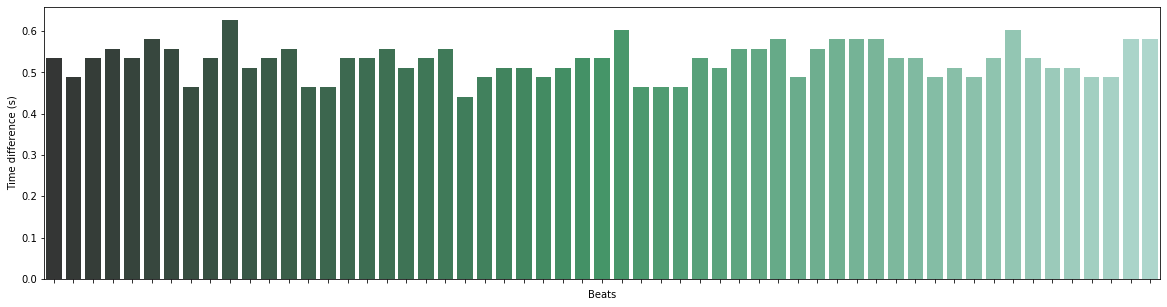

In [7]:
tempo, beat_frames = librosa.beat.beat_track(y=h, sr=sr)
print('Detected Tempo: '+str(tempo)+ ' beats/min')
beat_times = librosa.frames_to_time(beat_frames, sr=sr)
beat_time_diff=np.ediff1d(beat_times)
beat_nums = np.arange(1, np.size(beat_times))

fig, ax = plt.subplots()
fig.set_size_inches(20, 5)
ax.set_ylabel("Time difference (s)")
ax.set_xlabel("Beats")
g=sns.barplot(beat_nums, beat_time_diff, palette="BuGn_d",ax=ax)
g=g.set(xticklabels=[])

Chroma Energy Normalized (CENS)
Calculate the Chroma Energy Normalized (CENS) for the audio file.
A 12-element representation of the spectral energy where the bins represent the 12 equal-tempered pitch classes of western-type music (semitone spacing).

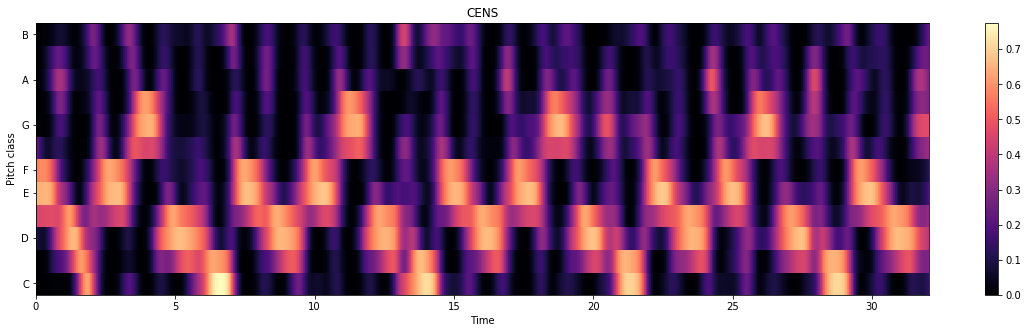

In [8]:
chroma=librosa.feature.chroma_cens(y=h, sr=sr) # only harmonic signal
plt.figure(figsize=(20, 5))
plt.title('CENS')
librosa.display.specshow(chroma,y_axis='chroma', x_axis='time')
plt.colorbar()

MFCCs
Mel-frequency cepstral coefficients (MFCCs) are coefficients that collectively make up an MFC.
They are derived from a type of cepstral representation of the audio clip (a nonlinear "spectrum-of-a-spectrum").
The difference between the cepstrum and the mel-frequency cepstrum is that in the MFC, the frequency bands are equally spaced on the mel scale, which approximates the human auditory system's response more closely than the linearly-spaced frequency bands used in the normal cepstrum.
This frequency warping can allow for better representation of sound, for example, in audio compression.

Text(0.5, 1.0, 'MFCC')

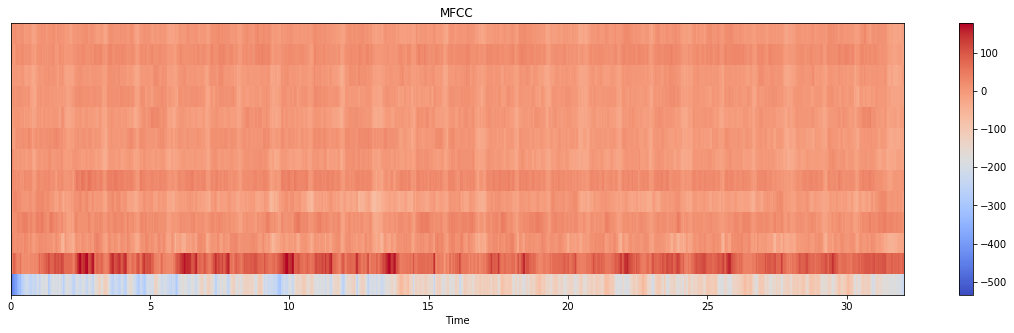

In [9]:
mfccs = librosa.feature.mfcc(y=h, sr=sr, n_mfcc=13) # only harmonic signal
plt.figure(figsize=(20, 5))
librosa.display.specshow(mfccs, x_axis='time')
plt.colorbar()
plt.title('MFCC')

Spectral Centroid
The spectral centroid is a measure used in digital signal processing to characterise a spectrum.
It indicates where the "center of mass" of the spectrum is. Perceptually, it has a robust connection with the impression of "brightness" of a sound.

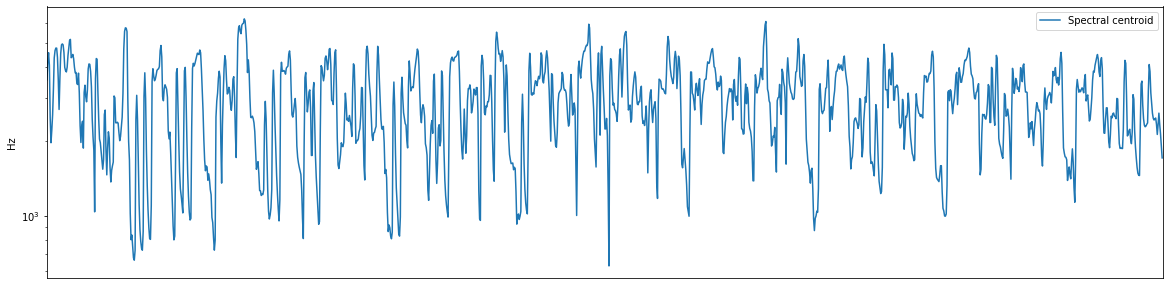

In [10]:
cent = librosa.feature.spectral_centroid(y=y, sr=sr) # all signal
plt.figure(figsize=(20,5))
plt.subplot(1, 1, 1)
plt.semilogy(cent.T, label='Spectral centroid')
plt.ylabel('Hz')
plt.xticks([])
plt.xlim([0, cent.shape[-1]])
plt.legend()

Spectral Contrast
OSC was developed to represent the spectral characteristics of a music piece.
It considers the spectral peak and valley in each sub-band separately.
In general, spectral peaks correspond to harmonic components and spectral valleys correspond to non-harmonic components or noise in a music piece.
Therefore, the difference between spectral peaks and spectral valleys will reflect the spectral contrast distribution.

Text(0.5, 1.0, 'Spectral contrast')

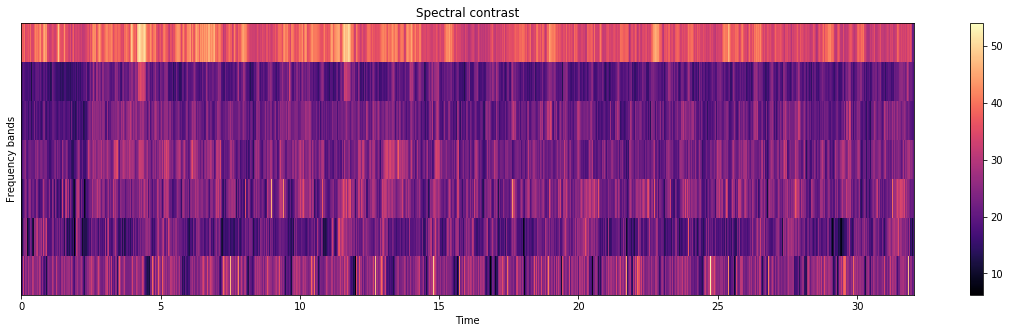

In [11]:
contrast=librosa.feature.spectral_contrast(y=h,sr=sr) # only harmonic signal
plt.figure(figsize=(20,5))
librosa.display.specshow(contrast, x_axis='time')
plt.colorbar()
plt.ylabel('Frequency bands')
plt.title('Spectral contrast')

Spectral Rolloff:
Spectral rolloff point is defined as the Nth percentile of the power spectral distribution, where N is usually 85% or 95%.
The rolloff point is the frequency below which the N% of the magnitude distribution is concentrated.
This measure is useful in distinguishing voiced speech from unvoiced: unvoiced speech has a high proportion of energy contained in the high-frequency range of the spectrum, where most of the energy for voiced speech and music is contained in lower bands.

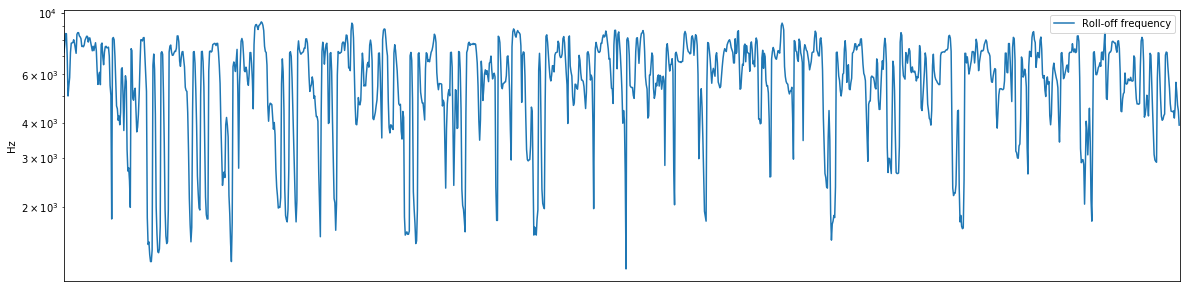

In [12]:
rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr) # all signal  
plt.figure(figsize=(20,5))
plt.semilogy(rolloff.T, label='Roll-off frequency')
plt.ylabel('Hz')
plt.xticks([])
plt.xlim([0, rolloff.shape[-1]])
plt.legend()

Zero Crossing Rate
A zero crossing point, is a point in a digital audio file where the sample is at zero amplitude.
At any other point, the amplitude of the wave is rising towards its peak or sinking towards its trough.
The zero-crossing rate is the rate of sign-changes along a signal, i.e., the rate at which the signal changes from positive to negative or back.
This feature has been used heavily in both speech recognition and music information retrieval, being a key feature to classify percussive sounds.

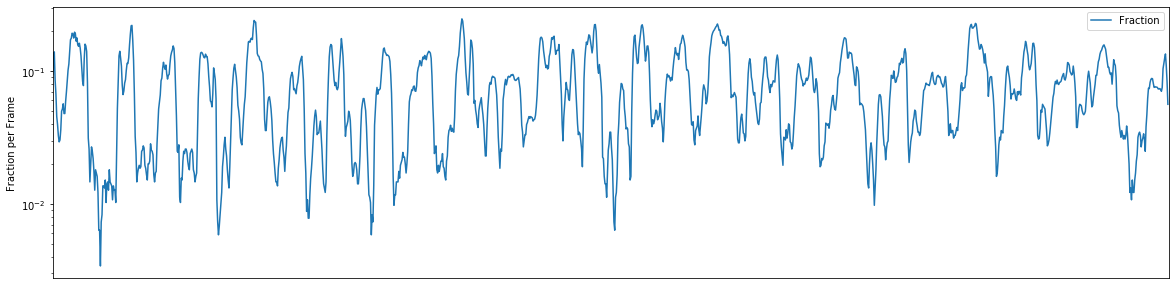

In [13]:
zrate=librosa.feature.zero_crossing_rate(h)
plt.figure(figsize=(20,5))
plt.semilogy(zrate.T, label='Fraction')
plt.ylabel('Fraction per Frame')
plt.xticks([])
plt.xlim([0, rolloff.shape[-1]])
plt.legend()

Spectrogram
is a visual representation of the spectrum of frequencies of a signal as it varies with time.
One axis represents time, and the other axis represents frequency; a third dimension indicating the amplitude of a particular frequency at a particular time is represented by the intensity or color of each point in the image.

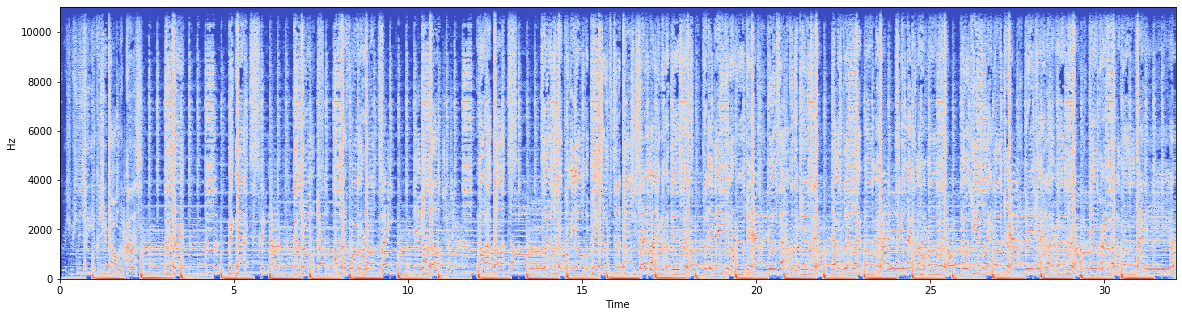

In [22]:
# Short Time Fourier Transform on the audio signal
Y = librosa.stft(y)

Ydb = librosa.amplitude_to_db(abs(Y))
plt.figure(figsize=(20, 5))
librosa.display.specshow(Ydb, sr=sr, x_axis='time', y_axis='hz')
plt.savefig('1.png')